<a href="https://colab.research.google.com/github/Kajal-ghadage2000/Deep-Learning/blob/master/cifar_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import cifar10
# loading the dataset 
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


170500096/170498071 [==============================] - 6s 0us/step


In [0]:
classes =[
"airplane",										
"automobile",										
"bird",										
"cat",										
"deer",										
"dog",										
"frog",										
"horse",										
"ship",										
"truck"]

In [0]:
# keras imports for the dataset and building our neural network
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils


# loading the dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# # building the input vector from the 32x32 pixels
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train /= 255
X_test /= 255

# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

# building a linear stack of layers with the sequential model
model = Sequential()

# convolutional layer
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32, 32, 3)))

# convolutional layer
model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# flatten output of conv
model.add(Flatten())

# hidden layer
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(10, activation='softmax'))

# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# training the model for 10 epochs
model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))

Shape before one-hot encoding:  (50000, 1)
Shape after one-hot encoding:  (50000, 10)
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 506s 10ms/step - loss: 1.6293 - accuracy: 0.4009 - val_loss: 1.3520 - val_accuracy: 0.5228
Epoch 2/10
50000/50000 [==============================] - 502s 10ms/step - loss: 1.1534 - accuracy: 0.5910 - val_loss: 0.9499 - val_accuracy: 0.6696
Epoch 3/10
50000/50000 [==============================] - 497s 10ms/step - loss: 0.9602 - accuracy: 0.6633 - val_loss: 0.8268 - val_accuracy: 0.7125
Epoch 4/10
50000/50000 [==============================] - 505s 10ms/step - loss: 0.8385 - accuracy: 0.7059 - val_loss: 0.7553 - val_accuracy: 0.7391
Epoch 5/10
50000/50000 [==============================] - 510s 10ms/step - loss: 0.7491 - accuracy: 0.7384 - val_loss: 0.7531 - val_accuracy: 0.7384
Epoch 6/10
50000/50000 [==============================] - 495s 10ms/step - loss: 0.6968 - accuracy: 0.7573 - val_loss: 

In [0]:
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def predict_fun(image_path):
      img=image.load_img(image_path ,target_size=(32,32))
      x=image.img_to_array(img)
      x=np.expand_dims(x,axis=0)
      x=x.astype('float32')/255
      pred=np.argmax(model.predict(x))
      #print(model.predict(x))
      #print(pred)

      print("Predicted output class: ",pred , "\t", classes[pred])
      plt.imshow(mpimg.imread(image_path))


Predicted output class:  0 	 airplane


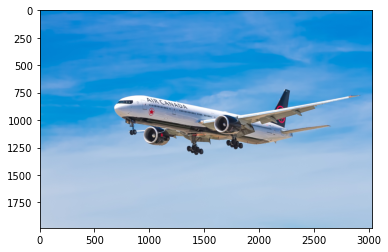

In [53]:
predict_fun("/content/sample_data/air1.jpeg")


Predicted output class:  1 	 automobile


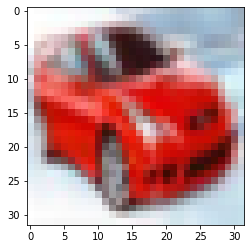

In [54]:
predict_fun("/content/sample_data/automobile.png")

Predicted output class:  2 	 bird


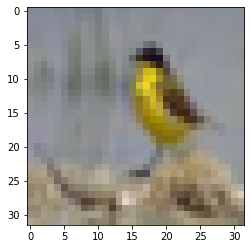

In [55]:
predict_fun("/content/sample_data/bird.jpeg")

Predicted output class:  7 	 horse


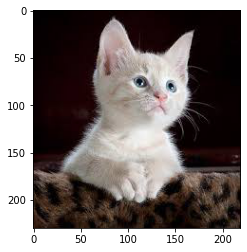

In [56]:
predict_fun("/content/sample_data/cat.jpeg")

Predicted output class:  4 	 deer


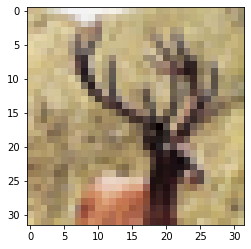

In [57]:
predict_fun("/content/sample_data/deer.jpeg")

Predicted output class:  3 	 cat


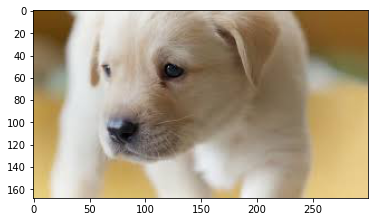

In [58]:
predict_fun("/content/sample_data/dog.jpeg")

Predicted output class:  6 	 frog


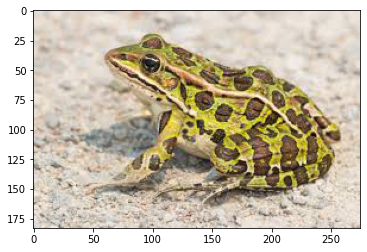

In [59]:
predict_fun("/content/sample_data/frog.jpeg")

Predicted output class:  7 	 horse


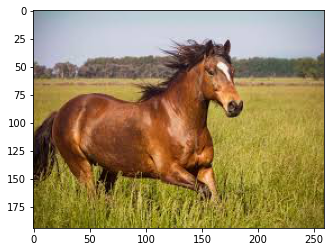

In [60]:
predict_fun("/content/sample_data/horse1.jpeg")

Predicted output class:  8 	 ship


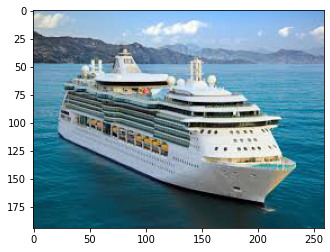

In [62]:
predict_fun("/content/sample_data/ship.jpeg")


Predicted output class:  9 	 truck


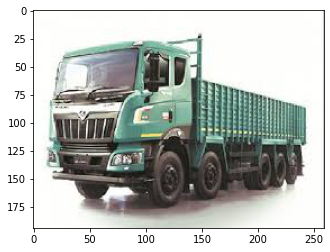

In [61]:
predict_fun("/content/sample_data/truck.jpeg")

In [0]:
#saving model
model_json = model.to_json()
with open("cifarjson77","w") as json_file:
  json_file.write(model_json)

model.save('cifar-CNN-77.model')

model.save("cifar_77.h5")

In [0]:
from google.colab import files
files.download("/content/cifar_77.h5")